# **FILTRADO COLABORATIVO**

Álvaro Fraile, Jaime Álvarez, Alejandro Mendoza

https://www.kaggle.com/competitions/recsys-filtrado-colaborativo-24-25

In [14]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise import Dataset, Reader, KNNBasic, KNNWithZScore
from surprise import accuracy
from surprise import SVD, NMF, SVDpp

## Lectura y preprocesamiento de datos

In [2]:
train_data = pd.read_csv('data/recsys-filtrado-colaborativo-24-25/train.csv')
submission_data = pd.read_csv('data/recsys-filtrado-colaborativo-24-25/test.csv')

# Dividir los datos en conjuntos de entrenamiento y prueba, dejando una copia del conjunto de entrenamiento intacta
train_data_copy = train_data.copy()
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(train_data)}")
print(f"Tamaño del conjunto de prueba: {len(test_data)}")
print(f"Tamaño del conjunto de envío: {len(submission_data)}")

# Calcular el promedio y la desviación estándar de las valoraciones
avg_rating = train_data['rating'].mean()
std_rating = train_data['rating'].std()

print(f"Promedio de valoraciones: {avg_rating}")
print(f"Desviación estándar de valoraciones: {std_rating}")

Tamaño del conjunto de entrenamiento: 312280
Tamaño del conjunto de prueba: 78071
Tamaño del conjunto de envío: 43320
Promedio de valoraciones: 7.601796464711157
Desviación estándar de valoraciones: 1.8423898868091482


In [3]:
# El formato de Surprise requiere un archivo en el siguiente formato (usuario, item, rating).
# Convertimos el dataframe de train al formato adecuado para Surprise
reader = Reader(rating_scale=(1, 10))  # Definir el rango de las valoraciones (1 a 10)
train_data_surprise = Dataset.load_from_df(train_data[['user', 'item', 'rating']], reader)

# Crear el conjunto de entrenamiento
trainset = train_data_surprise.build_full_trainset()

# Convert the test_data DataFrame to a list of tuples (user, item, rating)
testset = list(test_data[['user', 'item', 'rating']].itertuples(index=False, name=None))

## Modelos

In [4]:
RMSEs = {}

### SVD

In [5]:
start = time.time()

svd = SVD(verbose=True)
svd.fit(trainset)
predictions = svd.test(testset)
rmse = accuracy.rmse(predictions)
RMSEs['SVD'] = rmse

minutos, segundos = divmod(time.time() - start, 60)
print(f"******* Tiempo de entrenamiento SVD: {int(minutos)} minutos y {int(segundos)} segundos *******")

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 1.6478
******* Tiempo de entrenamiento SVD: 0 minutos y 4 segundos *******


Lower than 0: 35864
Equal to 0: 120
Greater than 0: 42087
Proportion of lower than 0: 0.4593767211896863


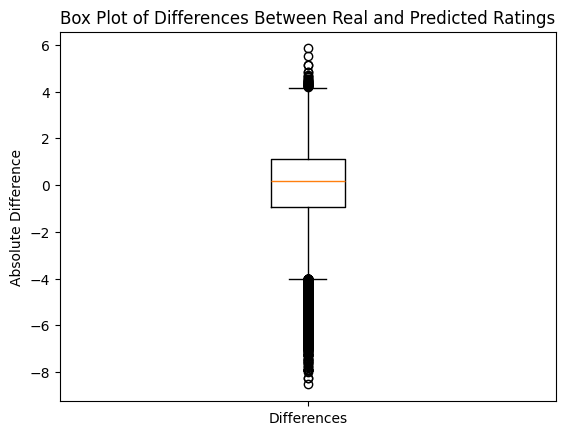

In [6]:
# Calculate the absolute differences between real and predicted ratings
differences = [pred.r_ui - pred.est for pred in predictions]

# Count the number of differences lower than 0, equal to 0, and greater than 0
lower_than_zero = sum(diff < 0 for diff in differences)
equal_to_zero = sum(diff == 0 for diff in differences)
greater_than_zero = sum(diff > 0 for diff in differences)

print(f"Lower than 0: {lower_than_zero}")
print(f"Equal to 0: {equal_to_zero}")
print(f"Greater than 0: {greater_than_zero}")
print(f"Proportion of lower than 0: {lower_than_zero / len(differences)}")

# Create a box plot for the differences
plt.boxplot(differences, tick_labels=['Differences'])
plt.ylabel('Absolute Difference')
plt.title('Box Plot of Differences Between Real and Predicted Ratings')
plt.show()

### NMF

In [7]:
start = time.time()

nmf = NMF(verbose=True)
nmf.fit(trainset)
predictions = nmf.test(testset)
rmse = accuracy.rmse(predictions)
RMSEs['NMF'] = rmse

minutos, segundos = divmod(time.time() - start, 60)
print(f"******* Tiempo de entrenamiento NMF: {int(minutos)} minutos y {int(segundos)} segundos *******")

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 2.44

### SVDpp

In [8]:
start = time.time()

svdpp = SVDpp(verbose=True, cache_ratings=True)
svdpp.fit(trainset)
predictions = svdpp.test(testset)
rmse = accuracy.rmse(predictions)
RMSEs['SVDpp'] = rmse

minutos, segundos = divmod(time.time() - start, 60)
print(f"******* Tiempo de entrenamiento SVD++: {int(minutos)} minutos y {int(segundos)} segundos *******")

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
RMSE: 1.6592
******* Tiempo de entrenamiento SVD++: 1 minutos y 7 segundos *******


Lower than 0: 36041
Equal to 0: 258
Greater than 0: 41772
Proportion of lower than 0: 0.46164388825556224


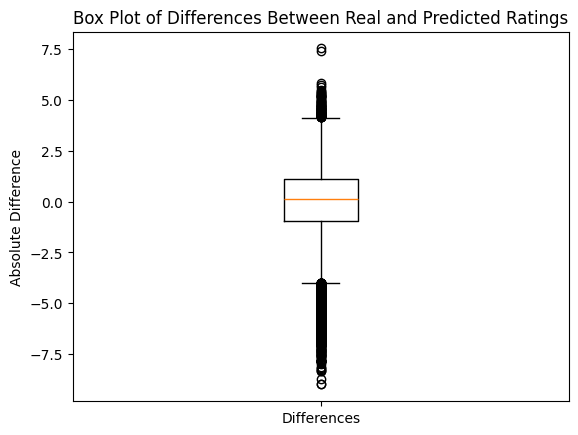

In [9]:
# Calculate the absolute differences between real and predicted ratings
differences = [pred.r_ui - pred.est for pred in predictions]

# Count the number of differences lower than 0, equal to 0, and greater than 0
lower_than_zero = sum(diff < 0 for diff in differences)
equal_to_zero = sum(diff == 0 for diff in differences)
greater_than_zero = sum(diff > 0 for diff in differences)

print(f"Lower than 0: {lower_than_zero}")
print(f"Equal to 0: {equal_to_zero}")
print(f"Greater than 0: {greater_than_zero}")
print(f"Proportion of lower than 0: {lower_than_zero / len(differences)}")

# Create a box plot for the differences
plt.boxplot(differences, tick_labels=['Differences'])
plt.ylabel('Absolute Difference')
plt.title('Box Plot of Differences Between Real and Predicted Ratings')
plt.show()


### KNN basic

In [10]:
start = time.time()

knnb = KNNBasic(k=80, sim_options={'name': 'msd', 'user_based': True, 'implicit': True}, verbose=True)
knnb.fit(trainset)
predictions = knnb.test(testset)
rmse = accuracy.rmse(predictions)
RMSEs['KNNBasic'] = rmse

minutos, segundos = divmod(time.time() - start, 60)
print(f"******* Tiempo de entrenamiento KNN basic: {int(minutos)} minutos y {int(segundos)} segundos *******")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.9284
******* Tiempo de entrenamiento KNN basic: 0 minutos y 55 segundos *******


### KNN with Z-Score

In [11]:
start = time.time()

knnz = KNNWithZScore(k=40, sim_options={'name': 'msd', 'user_based': True, 'implicit': False}, verbose=True)
knnz.fit(trainset)
predictions = knnz.test(testset)
rmse = accuracy.rmse(predictions)
RMSEs['KNNWithZScore'] = rmse

minutos, segundos = divmod(time.time() - start, 60)
print(f"******* Tiempo de entrenamiento KNN with Z-Score: {int(minutos)} minutos y {int(segundos)} segundos *******")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.8389
******* Tiempo de entrenamiento KNN with Z-Score: 1 minutos y 13 segundos *******


## Analysis

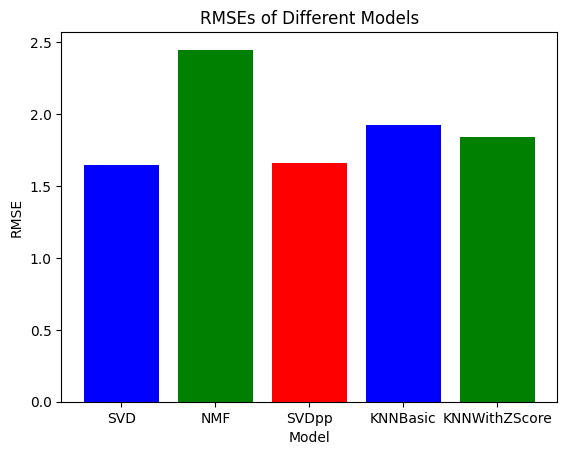

In [12]:
plt.bar(RMSEs.keys(), RMSEs.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSEs of Different Models')
plt.show()

## Optimizacion de parametros

In [15]:
start = time.time()

param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 40, 60],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.2]
}

grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1, joblib_verbose=2)
grid_search.fit(train_data_surprise)

# Obtener los mejores hiperparámetros y el mejor RMSE
best_params = grid_search.best_params['rmse']
best_rmse = grid_search.best_score['rmse']

print(f"***** Mejores hiperparámetros: {best_params} *****")
print(f"***** Mejor RMSE: {best_rmse} *****")

minutos, segundos = divmod(time.time() - start, 60)
print(f"******* Tiempo de GridSearchCV: {int(minutos)} minutos y {int(segundos)} segundos *******")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.9min


***** Mejores hiperparámetros: {'n_factors': 50, 'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.2} *****
***** Mejor RMSE: 1.6509937654556766 *****
******* Tiempo de GridSearchCV: 4 minutos y 10 segundos *******


[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  4.1min finished


## Final Predictions

In [ ]:
# Seleccionar el mejor modelo
# model = NMF(verbose=True, n_factors=100, n_epochs=50)
# model = SVD(verbose=True)
model = SVDpp(verbose=True)

start = time.time()

reader = Reader(rating_scale=(1, 10))  # Definir el rango de las valoraciones (1 a 10)
train_data_surprise = Dataset.load_from_df(train_data_copy[['user', 'item', 'rating']], reader)

# Crear el conjunto de entrenamiento
trainset = train_data_surprise.build_full_trainset()
model.fit(trainset)

predictions = model.test(testset)
rmse = accuracy.rmse(predictions)

minutos, segundos = divmod(time.time() - start, 60)
print(f"******* Tiempo de mejor modelo: {int(minutos)} minutos y {int(segundos)} segundos *******")

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
RMSE: 0.9678
******* Tiempo de mejor modelo: 1 minutos y 44 segundos *******


In [17]:
# Predecir las valoraciones para el conjunto de prueba
predictions = []
for _, user, item in submission_data[['ID', 'user', 'item']].values:
    pred = model.predict(user, item)
    predictions.append(pred.est)

# Añadir las predicciones al dataframe de test con redondeo
# submission_data['rating'] = [round(pred) for pred in predictions]
# submission_data['rating'] = [min(max(round(pred), 1), 10) for pred in predictions]
# submission_data['rating'] = [int(pred) for pred in predictions]
# submission_data['rating'] = predictions
# submission_data['rating'] = [round(pred * 2) / 2 for pred in predictions]

submission_path = 'predictions_tournament_1/predictions_svd_rounded.csv'
rounding_threshold = 0.45  # Define the threshold for rounding
submission_data['rating'] = [int(pred) + (1 if (pred - int(pred)) >= rounding_threshold else 0) for pred in predictions]
submission_data[['ID', 'rating']].to_csv(submission_path, index=False)